In [4]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
import time
import re
import warnings
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
%matplotlib inline

In [35]:
#read in the twitter_archive .csv file into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [36]:
#load the image-predictions .txt file using requests and read in as a .csv file into a DataFrame
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
    

In [37]:
#enter keys from Twitter API and access the API
consumer_key = 'dmwlhkv5qK9Sua7LqEGpURv3o'
consumer_secret = 'v1Dzy3WQtSezcfJNq3v5VTuh4JLd2fokP5qLrKgn7HjepNyBM4'
access_token = '1313559780724748296-JqOOnALnt2JZEAngSON5t6g9hu9ZKY'
access_secret = 'r9D09ujKjSWSsTuHgE9s93ifWLVe7TGl0XBuuhjkph9ZY'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [38]:
#load in the retweet_count, favorite_count, and date_time from the Twitter API as a JSON file
df_list = []
errors_list = []

start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet =  api.get_status(tweet_id, tweet_mode = 'extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json
        retweets = tweet['retweet_count']
        favorites = tweet['favorite_count']
        date_time = tweet['created_at']
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets':int(retweets), 'date_time': pd.to_datetime(date_time)})
    
    except Exception as e:
        print(str(tweet_id)+ '_' + str(e))
        errors_list.append(tweet_id)
        
end = time.time()

duration = end - start #get the time it took to process

print(duration)



888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130_[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778_[{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 715


754011816964026368_[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288_[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 715


1924.6315703392029


In [39]:
#print how many successful tweets and errors were pulled, as well as how long it took to do so
print('number of successful tweets:', len(df_list))
print('number of errors:', len(errors_list))
print('process duration', duration/60, 'minutes')

number of successful tweets: 2331
number of errors: 25
process duration 32.07719283898671 minutes


In [40]:
#read the JSON file into a DataFrame and also save as a .csv file
tweet_json = pd.DataFrame(df_list, columns = ['tweet_id','favorites','retweets','date_time'])
tweet_json.to_csv('tweet_json.csv', index = False)

In [41]:
#Re-read in the .csv file
tweet_df = pd.read_csv('tweet_json.csv')

**Assess Visually (I also used the .csv file and loading them into Excel to find other issues not listed here)**

In [42]:
#use sample to look through the DataFrame 10 random selections at a time to find any issues
tweet_df.sample(10)

,tweet_id,favorites,retweets,date_time
1370,700002074055016451,3236,1305,2016-02-17 17:01:14+00:00
1020,743609206067040256,4390,1354,2016-06-17 01:00:24+00:00
2166,668955713004314625,258,66,2015-11-24 00:54:05+00:00
1324,704347321748819968,1542,341,2016-02-29 16:47:42+00:00
845,761976711479193600,5342,1985,2016-08-06 17:26:19+00:00
2116,669993076832759809,305,77,2015-11-26 21:36:12+00:00
268,839549326359670784,26963,7557,2017-03-08 18:52:12+00:00
968,748692773788876800,4182,1308,2016-07-01 01:40:41+00:00
632,792883833364439040,11319,4278,2016-10-31 00:20:11+00:00
937,751132876104687617,4994,1278,2016-07-07 19:16:47+00:00


In [43]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1231,713177543487135744,NaN,NaN,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,None,None,None,None
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670427002...,9,10,a,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
1638,684188786104872960,NaN,NaN,2016-01-05 01:44:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684188786...,10,10,None,None,None,None,None
1327,705975130514706432,NaN,NaN,2016-03-05 04:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705975130...,10,10,Adele,None,None,pupper,None
937,753298634498793472,NaN,NaN,2016-07-13 18:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,6.815232e+17,4.196984e+09,2015-12-28 17:12:42 +0000,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
2179,669006782128353280,NaN,NaN,2015-11-24 04:17:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He is 100% ready for the sport...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669006782...,12,10,Tucker,None,None,None,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None
577,800855607700029440,NaN,NaN,2016-11-22 00:17:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Lin_Manuel: 11/10 would recommend. https:/...,8.008540e+17,7.992370e+07,2016-11-22 00:10:52 +0000,https://twitter.com/littlewiewel/status/800852...,11,10,None,None,None,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None


In [44]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
918,701601587219795968,https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg,1,Chihuahua,0.993661,True,Pembroke,0.001505,True,toy_terrier,0.000867,True
1484,781524693396357120,https://pbs.twimg.com/media/CtiIj0AWcAEBDvw.jpg,1,tennis_ball,0.994712,False,Chesapeake_Bay_retriever,0.003523,True,Labrador_retriever,0.000921,True
36,666447344410484738,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,curly-coated_retriever,0.322084,True,giant_schnauzer,0.287955,True,Labrador_retriever,0.166331,True
1052,714141408463036416,https://pbs.twimg.com/media/Cekj0qwXEAAHcS6.jpg,1,Labrador_retriever,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
2018,880221127280381952,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,1,Chihuahua,0.238525,True,meerkat,0.104256,False,clumber,0.052580,True
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True
1116,725729321944506368,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,1,boxer,0.599076,True,bull_mastiff,0.177318,True,French_bulldog,0.141461,True
992,708109389455101952,https://pbs.twimg.com/media/CdO1u9vWAAApj2V.jpg,1,Staffordshire_bullterrier,0.516106,True,American_Staffordshire_terrier,0.236075,True,kelpie,0.069750,True


**Assess Programmatically**

In [45]:
#assess programmatically using info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweets   2331 non-null   int64 
 3   date_time  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [46]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [47]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
#get a look at the ratings more in detail
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [49]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [50]:
#take a closer look at the names alone
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
by            1
Geno          1
DayZ          1
Aubie         1
Leonidas      1
Name: name, Length: 957, dtype: int64

<h1> Summary </h1>

<p> <b>Quality</b> </p>

<p> <ul>
  <li>Retweets are included</li>
  <li>Some tweets do not have images</li>
  <li>Some dogs don't have names or they are not actual names</li>
  <li>Retweet columns are missing values and are not needed</li>
  <li>Extra dog predictions or confidence level aren't necessary</li>
  <li>Some numerators and demoninators don't follow WeRateDogs standard rating convention</li>
  <li>Timestamp column is hard to read</li>
  <li>Source column is messy</li>
  <li>Tweet ID's should be strings</li>
  <li>Reply status columns aren't needed</li>
  <li>Only the portion behind the decimal pulled for ratings with decimals</li>
  <li>Some denominators don't follow the standards</li>
  <li>Some denominators don't follow the standards</li>

</ul> </p>

<p> <b>Tidiness</b> </p>

<p> <ul>
  <li>Tables can be merged into one</li>
  <li>Four columns for dog description, e.g. puppo, floofer, etc.</li>
</ul> </p>

    

<h1>Cleaning</h1>

In [51]:
#creat copies of DataFrames before working on them
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
tweet_df_clean = tweet_df.copy()

**Tidiness**

Define:

Merge tables into one using pd.merge

Code:

In [52]:
#merging the first two DataFrames
twitter_archive_clean = pd.merge(left = twitter_archive_clean, right = tweet_df_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')


In [53]:
#merging last DataFrame with other two
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on = 'tweet_id', how = 'inner')

Test:

In [54]:
twitter_archive_clean['tweet_id'].count()

2059

In [55]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorites', 'retweets', 'date_time', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

Define:

Use pd.melt to create one column from four dog description columns

Code:

In [56]:
#finding total number of columnns
len(twitter_archive_clean.columns)

31

In [57]:
#creating variables for the different columns to melt
dog_descriptions = list(twitter_archive_clean.iloc[:,13:17])
other_columns = list(twitter_archive_clean.iloc[:,np.r_[0:13,17:c31]])

In [58]:
#melting the dog description columns into one
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = other_columns, value_vars = dog_descriptions, var_name = 'description', value_name = 'dog_description')


In [59]:
#dropping unnecessary var_name that was created
twitter_archive_clean = twitter_archive_clean.drop('description', axis=1)

In [60]:
#melting made duplicates
twitter_archive_clean['tweet_id'].count()

8236

In [61]:
#dropping the duplicated tweets that were created from the pd.melt
twitter_archive_clean = twitter_archive_clean.sort_values('dog_description').drop_duplicates('tweet_id', keep = 'last')


Test:

In [62]:
twitter_archive_clean['tweet_id'].count()

2059

In [63]:
twitter_archive_clean['dog_description'].value_counts()

None       1741
pupper      221
doggo        65
puppo        24
floofer       8
Name: dog_description, dtype: int64

**Quality**

Define:

Drop retweets from dataframe

Code:

In [65]:
#only keeping rows that have retweet status as NaN
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean['retweeted_status_id'])]

Test:

In [66]:
twitter_archive_clean['tweet_id'].count()

1987

In [67]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'favorites', 'retweets', 'date_time',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_description'],
      dtype='object')

Define:

Replace None in dog_description with NaN

Code:

In [68]:
#replacing Nones with NaN
twitter_archive_clean['dog_description'] = twitter_archive_clean['dog_description'].replace('None',np.NaN)

Test:

In [69]:
twitter_archive_clean['dog_description'].value_counts()

pupper     212
doggo       62
puppo       23
floofer      8
Name: dog_description, dtype: int64

Define:

Drop unnecessary columns from dataframe

Code:

In [70]:
#creating variable of columns we don't need using .iloc in combination with np.r_
unnecessary_columns = list(twitter_archive_clean.iloc[:, np.r_[1:4,6:9,]])

In [71]:
unnecessary_columns

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

In [72]:
#dropping those columns
twitter_archive_clean = twitter_archive_clean.drop(unnecessary_columns, axis = 1)

Test:

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1982 to 7053
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   int64  
 1   source              1987 non-null   object 
 2   text                1987 non-null   object 
 3   expanded_urls       1987 non-null   object 
 4   rating_numerator    1987 non-null   int64  
 5   rating_denominator  1987 non-null   int64  
 6   name                1987 non-null   object 
 7   favorites           1987 non-null   int64  
 8   retweets            1987 non-null   int64  
 9   date_time           1987 non-null   object 
 10  jpg_url             1987 non-null   object 
 11  img_num             1987 non-null   int64  
 12  p1                  1987 non-null   object 
 13  p1_conf             1987 non-null   float64
 14  p1_dog              1987 non-null   bool   
 15  p2                  1987 non-null   object 
 16  p2_

Define:

Define a function that can pull just the first dog breed that is in fact a dog breed and has the highest confidence, which is the first dog breed that is in fact a dog breed

Code:

In [74]:
#defining function that will select the first actual dog breed, which is also the most confident prediction, or 
#appending NaN, if there isn't a good prediction
dog_breed = []

def breed(df):
    if df['p1_dog'] == True:
        dog_breed.append(df['p1'])
    elif df['p2_dog'] == True:
        dog_breed.append(df['p2'])
    elif df['p3_dog'] == True:
        dog_breed.append(df['p3'])
    else:
        dog_breed.append(np.NaN)

In [75]:
#applying the function to the DataFrame
twitter_archive_clean.apply(breed,axis=1);

In [76]:
#creating the new dog_breed column
twitter_archive_clean['dog_breed'] = dog_breed

In [77]:
#making all the breeds lowercase, so that they're consistent
twitter_archive_clean['dog_breed'] = twitter_archive_clean['dog_breed'].str.lower()

In [78]:
#selecting the prediction columns that are no longer needed
drop_prediction_columns = list(twitter_archive_clean.iloc[:, 12:21])

In [79]:
drop_prediction_columns

['p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [80]:
#dropping those columns
twitter_archive_clean = twitter_archive_clean.drop(drop_prediction_columns, axis = 1)

Test:

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1982 to 7053
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1987 non-null   int64 
 1   source              1987 non-null   object
 2   text                1987 non-null   object
 3   expanded_urls       1987 non-null   object
 4   rating_numerator    1987 non-null   int64 
 5   rating_denominator  1987 non-null   int64 
 6   name                1987 non-null   object
 7   favorites           1987 non-null   int64 
 8   retweets            1987 non-null   int64 
 9   date_time           1987 non-null   object
 10  jpg_url             1987 non-null   object
 11  img_num             1987 non-null   int64 
 12  dog_description     305 non-null    object
 13  dog_breed           1679 non-null   object
dtypes: int64(6), object(8)
memory usage: 232.9+ KB


Define:

Clean date_time column by cutting off the +00:00 at the end and making date_time data type

Code:

In [82]:
#stripping unneeded portion from date_time column
twitter_archive_clean['date_time'] = twitter_archive_clean['date_time'].str[:-6]

In [83]:
#changing data type to date_time
twitter_archive_clean['date_time'] = pd.to_datetime(twitter_archive_clean['date_time'])

Test:

In [84]:
twitter_archive_clean['date_time']

1982   2015-11-19 20:14:03
1981   2015-11-19 20:20:22
1980   2015-11-19 20:44:47
1979   2015-11-19 21:22:56
1978   2015-11-19 21:32:34
               ...        
6189   2017-07-25 01:55:32
6314   2017-05-03 03:17:27
6497   2017-01-21 18:26:02
6918   2016-07-21 23:53:04
7053   2016-06-03 01:07:16
Name: date_time, Length: 1987, dtype: datetime64[ns]

Define:

Clean source column by dropping everything but the actual source by using regex.

Code:

In [85]:
#using regex to extract only the true source and then saving it as the new source column
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract(r'.*>(.*)<.*')

Test:

In [86]:
twitter_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,date_time,jpg_url,img_num,dog_description,dog_breed
1982,667435689202614272,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,289,79,2015-11-19 20:14:03,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,NaN,rottweiler
1981,667437278097252352,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,423,219,2015-11-19 20:20:22,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,1,NaN,NaN
1980,667443425659232256,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,733,538,2015-11-19 20:44:47,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,NaN,NaN
1979,667453023279554560,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,296,81,2015-11-19 21:22:56,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,NaN,labrador_retriever
1978,667455448082227200,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,179,56,2015-11-19 21:32:34,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,NaN,tibetan_terrier


Define:

Fix dog names by dropping the lower case words that were mistakenly extracted as dog names by defining a function to pull these names from the dataframe

Code:

In [87]:
#defining a function that will pull a name that is in lowercase and append to the not_names list
not_names = []

def name(df):
    if df['name'].islower() and df['name'] not in not_names:
        not_names.append(df['name'])

In [88]:
#applying to DataFrame
twitter_archive_clean.apply(name, axis = 1);

In [89]:
#adding None to not_name list as well
not_names.append('None')
not_names

['a',
 'an',
 'quite',
 'the',
 'such',
 'getting',
 'actually',
 'infuriating',
 'very',
 'light',
 'space',
 'just',
 'by',
 'officially',
 'incredibly',
 'one',
 'my',
 'not',
 'this',
 'unacceptable',
 'his',
 'all',
 'None']

In [90]:
#replace the names that aren't actually names with NaN
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(not_names,np.NaN)

Test:

In [91]:
twitter_archive_clean.name.value_counts()

Cooper      10
Oliver      10
Charlie     10
Penny        9
Tucker       9
            ..
Sonny        1
Asher        1
Tater        1
Juckson      1
Napolean     1
Name: name, Length: 911, dtype: int64

Define:

Drop the tweets with denominators that don't fit the usual standards, i.e. those that aren't 10

Code:

In [92]:
#set the DataFrame to only include denominators that are 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['rating_denominator'] == 10]

Test:

In [93]:
twitter_archive_clean['rating_denominator'].value_counts()

10    1969
Name: rating_denominator, dtype: int64

Define:

Using regex find the numerators with decimals that weren't pulled correctly and then updated these in the dataframe

Code:

In [94]:
twitter_archive_clean.sort_index(inplace = True)

In [140]:
#using regex to find the rows that have rating with decimals, also filtering the warning for the regex
twitter_archive_clean[twitter_archive_clean['text'].str.contains(r'.*(\d+\.\d+/\d+).*')]
warnings.filterwarnings("ignore", 'This pattern has match groups')

Source: https://stackoverflow.com/questions/39901550/python-userwarning-this-pattern-has-match-groups-to-actually-get-the-groups

In [96]:
#using .loc to select these rows, then updating them to the correct rating
twitter_archive_clean.loc[40,'rating_numerator'] = twitter_archive_clean.loc[40,'rating_numerator'] = 13.5
twitter_archive_clean.loc[2607,'rating_numerator'] = twitter_archive_clean.loc[2607,'rating_numerator'] = 9.75
twitter_archive_clean.loc[3497,'rating_numerator'] = twitter_archive_clean.loc[3497,'rating_numerator'] = 11.26
twitter_archive_clean.loc[4721,'rating_numerator'] = twitter_archive_clean.loc[4721,'rating_numerator'] = 11.27

Test:

In [97]:
#using .loc with np.r_ to check they were saved
twitter_archive_clean.loc[np.r_[40,2607,3497,4721]]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,date_time,jpg_url,img_num,dog_description,dog_breed
40,883482846933004288,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,42276,8818,2017-07-08 00:28:19,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,NaN,golden_retriever
2607,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,18229,6119,2016-10-13 23:23:56,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,NaN,pomeranian
3497,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,1675,471,2015-12-25 21:06:00,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,NaN,kuvasz
4721,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,6517,1596,2016-09-20 00:24:34,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,pupper,clumber


Define:

Drop the numerators over 20, because they don't fit the normal rating convention

Code:

In [98]:
#create series of numerators over 20
numerators_over20 = twitter_archive_clean[twitter_archive_clean['rating_numerator'] > 20]
numerators_over20

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,date_time,jpg_url,img_num,dog_description,dog_breed
2848,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,5047,2418,2016-07-04 15:00:45,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,NaN,NaN
3840,670842764863651840,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,23317,8117,2015-11-29 05:52:33,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,NaN,NaN


In [99]:
#dropping the two that are over 20
twitter_archive_clean = twitter_archive_clean.drop([2848, 3840])

Test:

In [100]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00    448
10.00    418
11.00    396
13.00    257
9.00     150
8.00      95
7.00      51
14.00     35
5.00      32
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
11.26      1
13.50      1
9.75       1
11.27      1
Name: rating_numerator, dtype: int64

Define:

Fix data types by assigning them to types that make more sense for this data

Code:

In [101]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1 to 8235
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1967 non-null   int64         
 1   source              1967 non-null   object        
 2   text                1967 non-null   object        
 3   expanded_urls       1967 non-null   object        
 4   rating_numerator    1967 non-null   float64       
 5   rating_denominator  1967 non-null   int64         
 6   name                1339 non-null   object        
 7   favorites           1967 non-null   int64         
 8   retweets            1967 non-null   int64         
 9   date_time           1967 non-null   datetime64[ns]
 10  jpg_url             1967 non-null   object        
 11  img_num             1967 non-null   int64         
 12  dog_description     305 non-null    object        
 13  dog_breed           1662 non-null   object      

Code:

In [102]:
#using .astype to change the data types
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['dog_description'] = twitter_archive_clean['dog_description'].astype('category')
twitter_archive_clean['dog_breed'] = twitter_archive_clean['dog_breed'].astype('category')
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

Test:

In [103]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1967 entries, 1 to 8235
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1967 non-null   object        
 1   source              1967 non-null   category      
 2   text                1967 non-null   object        
 3   expanded_urls       1967 non-null   object        
 4   rating_numerator    1967 non-null   float64       
 5   rating_denominator  1967 non-null   float64       
 6   name                1339 non-null   object        
 7   favorites           1967 non-null   int64         
 8   retweets            1967 non-null   int64         
 9   date_time           1967 non-null   datetime64[ns]
 10  jpg_url             1967 non-null   object        
 11  img_num             1967 non-null   int64         
 12  dog_description     305 non-null    category      
 13  dog_breed           1662 non-null   category    

**Store the master dataframe as a .csv file**

In [104]:
#saving the twitter_archive_clean as as twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

<h1>Visualizations</h1>

In [111]:
#re-reading in master DataFrame
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [112]:
#getting the average rating per dog type
means = twitter_archive_master.groupby('dog_description').mean()['rating_numerator']

In [113]:
#setting the colors of the bars
from itertools import cycle, islice
my_colors = list(islice(cycle(['b', 'r', 'g', 'y']), None, len(means)))

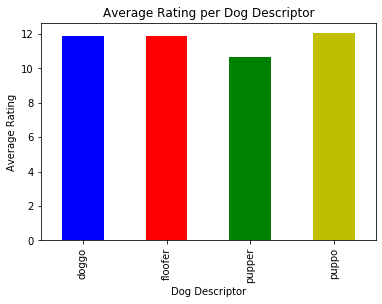

In [114]:
#plotting bar chart
means.plot.bar(x = 'Dog Descriptor', color = my_colors);
plt.xlabel('Dog Descriptor');
plt.ylabel('Average Rating');
plt.title('Average Rating per Dog Descriptor');

Source: https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors

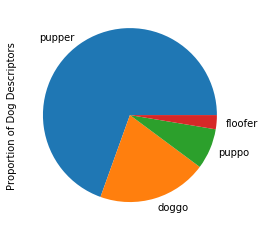

In [115]:
#creating pie chart for proportion of dog types
twitter_archive_master['dog_description'].value_counts().plot(kind = 'pie');
plt.ylabel('Proportion of Dog Descriptors');

In [116]:
#getting the sum of retweets for each dog type
doggo_retweets = twitter_archive_master.query('dog_description == "doggo"')['retweets'].sum()
floofer_retweets = twitter_archive_master.query('dog_description == "floofer"')['retweets'].sum()
pupper_retweets = twitter_archive_master.query('dog_description == "pupper"')['retweets'].sum()
puppo_retweets = twitter_archive_master.query('dog_description == "puppo"')['retweets'].sum()

num_retweets = doggo_retweets, floofer_retweets, pupper_retweets, puppo_retweets

In [117]:
#adding each to get the total retweets for the dogs that had one of the dog descriptors
total_retweets = doggo_retweets + floofer_retweets + pupper_retweets + puppo_retweets

In [118]:
#creating list of proportions
proportions_retweets = [(doggo_retweets/total_retweets), (floofer_retweets/total_retweets), (pupper_retweets/total_retweets), (puppo_retweets/total_retweets)] 

In [119]:
#setting label names
labels = 'doggo', 'floofer', 'pupper', 'puppo'

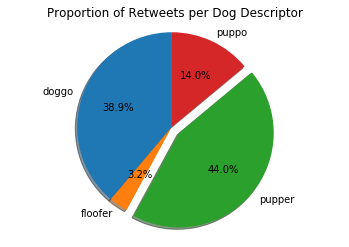

In [120]:
#plotting pie chart of proportions of retweets per dog type and 'exploding' the most popular dog type 'puppo'
labels = labels
sizes_retweets = proportions_retweets
explode = (0, 0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(np.array(sizes_retweets).ravel(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.title('Proportion of Retweets per Dog Descriptor')

plt.show()

Source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

In [121]:
#getting the sum of retweets for each dog type
doggo_favorites = twitter_archive_master.query('dog_description == "doggo"')['favorites'].sum()
floofer_favorites= twitter_archive_master.query('dog_description == "floofer"')['favorites'].sum()
pupper_favorites = twitter_archive_master.query('dog_description == "pupper"')['favorites'].sum()
puppo_favorites = twitter_archive_master.query('dog_description == "puppo"')['favorites'].sum()

num_favorites = doggo_favorites, floofer_favorites, pupper_favorites, puppo_favorites

In [122]:
#adding each to get the total retweets for the dogs that had one of the dog descriptors
total_favorites = doggo_favorites + floofer_favorites + pupper_favorites + puppo_favorites

In [123]:
#creating list of proportions
proportions_favs = [(doggo_favorites/total_favorites), (floofer_favorites/total_favorites), (pupper_favorites/total_favorites), (puppo_favorites/total_favorites)]


In [124]:
#setting label names
labels = 'doggo', 'floofer', 'pupper', 'puppo'

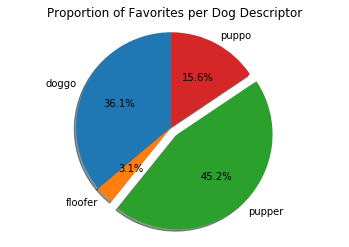

In [125]:
#plotting pie chart of proportions of favorites per dog type and 'exploding' the most popular dog type 'puppo'
labels = labels
sizes_favs = proportions_favs
explode = (0, 0, 0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(np.array(sizes_favs).ravel(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Proportion of Favorites per Dog Descriptor')

plt.show()

In [126]:
#creating dataframe for correlation analysis
total_desc = twitter_archive_master['dog_description'].value_counts().sum()

proportion_doggo = twitter_archive_master.query('dog_description == "doggo"')['dog_description'].count()/total_desc
proportion_puppo = twitter_archive_master.query('dog_description == "puppo"')['dog_description'].count()/total_desc
proportion_pupper = twitter_archive_master.query('dog_description == "pupper"')['dog_description'].count()/total_desc
proportion_floofer = twitter_archive_master.query('dog_description == "floofer"')['dog_description'].count()/total_desc

desc_proportions = proportion_doggo, proportion_floofer, proportion_pupper, proportion_puppo

In [127]:
retweet_favs_dict = {'count_of_dog_descriptors': [62, 8, 212, 23], 'number_of_retweets': num_retweets, 'number_of_favorites': num_favorites}


In [128]:
corr_df = pd.DataFrame(data = retweet_favs_dict)

In [129]:
#calculating correlation coefficient between count of dog descriptors and number of retweets
corr_df['count_of_dog_descriptors'].corr(corr_df['number_of_retweets'])

0.8129301875342814

In [130]:
#calculating correlation coefficient between count of dog descriptors and number of favorites
corr_df['count_of_dog_descriptors'].corr(corr_df['number_of_favorites'])

0.8544947755523944

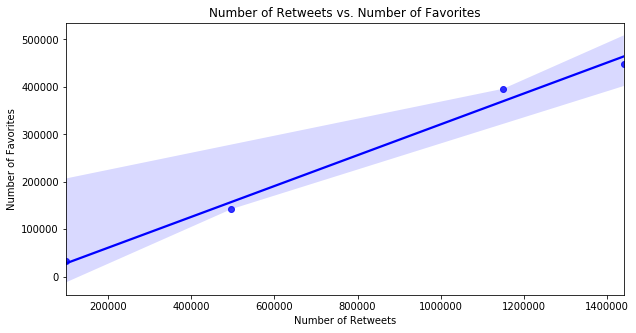

In [131]:
plt.figure(figsize = (10,5))
ax2 = sns.regplot(x = 'number_of_favorites', y = 'number_of_retweets', data = corr_df, color = 'b')
ax2.set(title = 'Number of Retweets vs. Number of Favorites')
ax2.set(ylabel = 'Number of Favorites')
ax2.set(xlabel = 'Number of Retweets');

In [132]:
top10_breed = twitter_archive_master['dog_breed'].value_counts()[:10]

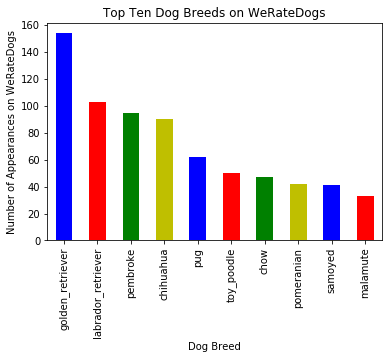

In [133]:
top10_breed.plot.bar(x = 'Dog Breed', color = my_colors);
plt.xlabel('Dog Breed');
plt.ylabel('Number of Appearances on WeRateDogs');
plt.title('Top Ten Dog Breeds on WeRateDogs');

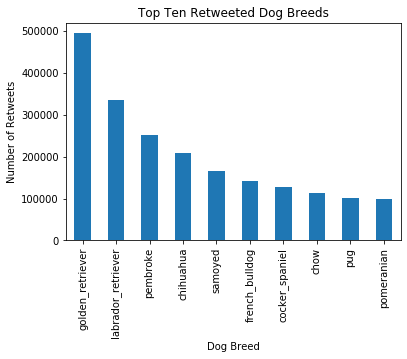

In [159]:
twitter_archive_master.groupby('dog_breed')['retweets'].sum().sort_values(ascending = False)[:10].plot.bar(x = 'Dog Breed');
plt.xlabel('Dog Breed');
plt.ylabel('Number of Retweets');
plt.title('Top Ten Retweeted Dog Breeds');

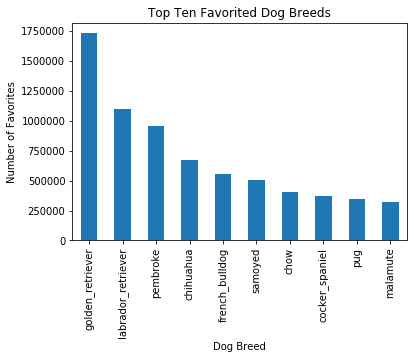

In [160]:
twitter_archive_master.groupby('dog_breed')['favorites'].sum().sort_values(ascending = False)[:10].plot.bar(x = 'Dog Breed')
plt.xlabel('Dog Breed');
plt.ylabel('Number of Favorites');
plt.title('Top Ten Favorited Dog Breeds');

In [144]:
top10_favorites = twitter_archive_master.groupby('dog_breed')['favorites'].sum().sort_values(ascending = False)[:10]
top10_retweets = twitter_archive_master.groupby('dog_breed')['retweets'].sum().sort_values(ascending = False)[:10]
top10_breed = twitter_archive_master['dog_breed'].value_counts()[:10]

In [145]:
top10_retweets_dict = {'Top 10 Retweets': top10_retweets}

In [146]:
top10_retweets = pd.DataFrame(data = top10_retweets_dict)

In [147]:
top10_favorites_dict = {'Top 10 Favorites': top10_favorites}

In [148]:
top10_favorites = pd.DataFrame(data = top10_favorites_dict)

In [157]:
top10_favorites

,Top 10 Favorites
dog_breed,
golden_retriever,1731527
labrador_retriever,1100112
pembroke,953437
chihuahua,671264
french_bulldog,553316
samoyed,507419
chow,407830
cocker_spaniel,371970
pug,343529


In [158]:
top10_retweets

,Top 10 Retweets
dog_breed,
golden_retriever,494800
labrador_retriever,336417
pembroke,253028
chihuahua,209831
samoyed,166472
french_bulldog,141175
cocker_spaniel,127114
chow,113796
pug,101167


In [149]:
#dropping NaN's from master DataFrame 
twitter_archive_master_cloud = twitter_archive_master.dropna()

In [150]:
#generating wordcloud (source for code help below)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(twitter_archive_master_cloud['name']))

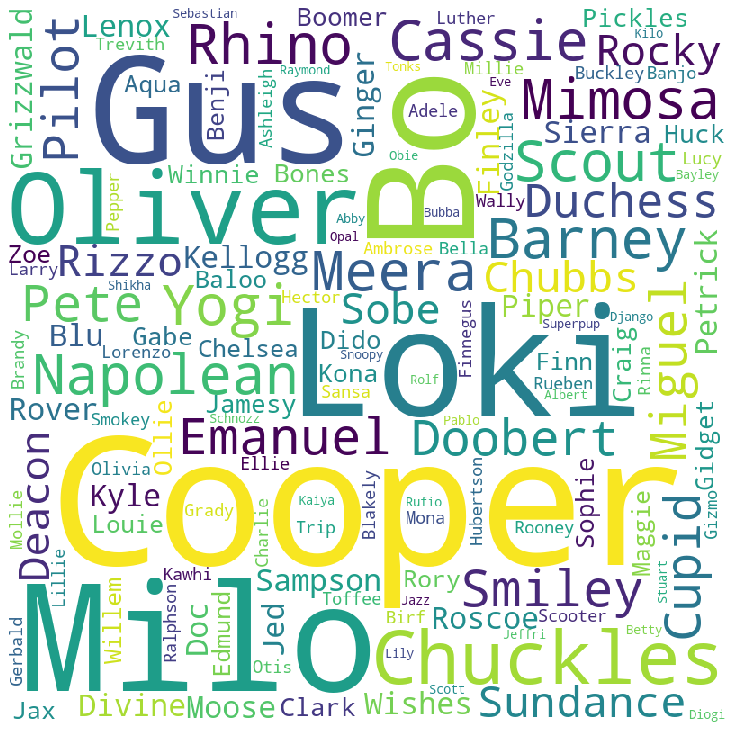

In [346]:
#displaying wordcloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Source: https://towardsdatascience.com/create-your-own-word-cloud-705798556574

In [170]:
print(twitter_archive_master['retweets'].max())
print(twitter_archive_master['favorites'].max())

75969
153323


In [172]:
twitter_archive_master['rating_numerator'].max()

14.0

In [171]:
twitter_archive_master[(twitter_archive_master['retweets'] == 75969) & (twitter_archive_master['favorites'] == 153323)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,date_time,jpg_url,img_num,dog_description,dog_breed
122,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,153323,75969,2016-06-18 18:26:18,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,doggo,labrador_retriever


In [173]:
twitter_archive_master[twitter_archive_master['rating_numerator'] == 14.0]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,date_time,jpg_url,img_num,dog_description,dog_breed
8,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,29380,6536,2017-07-26 15:59:51,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,doggo,pembroke
18,887517139158093824,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10.0,NaN,42769,10517,2017-07-19 03:39:09,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,NaN,NaN
31,884441805382717440,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10.0,NaN,24986,5080,2017-07-10 15:58:53,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,NaN,pembroke
55,878057613040115712,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,38901,6080,2017-06-23 01:10:23,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,NaN,french_bulldog
79,832273440279240704,Twitter for iPhone,Say hello to Smiley. He's a blind therapy dogg...,https://twitter.com/dog_rates/status/832273440...,14.0,10.0,Smiley,11213,2294,2017-02-16 17:00:25,https://pbs.twimg.com/ext_tw_video_thumb/83227...,1,doggo,pembroke
84,828381636999917570,Twitter for iPhone,Meet Doobert. He's a deaf doggo. Didn't stop h...,https://twitter.com/dog_rates/status/828381636...,14.0,10.0,Doobert,12478,2188,2017-02-05 23:15:47,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1,doggo,bedlington_terrier
90,821407182352777218,Twitter for iPhone,This is Sundance. He's a doggo drummer. Even s...,https://twitter.com/dog_rates/status/821407182...,14.0,10.0,Sundance,11704,4303,2017-01-17 17:21:47,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,doggo,irish_setter
93,819006400881917954,Twitter for iPhone,This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,14.0,10.0,Sunny,45138,18884,2017-01-11 02:21:57,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,doggo,NaN
94,819004803107983360,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,86681,36678,2017-01-11 02:15:36,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,doggo,standard_poodle
114,755206590534418437,Twitter for iPhone,This is one of the most inspirational stories ...,https://twitter.com/dog_rates/status/755206590...,14.0,10.0,NaN,16215,5276,2016-07-19 01:04:16,https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,doggo,NaN


**Although this doggo 'only' received a rating of 13 as opposed to the highest rating in this dataframe, 14, this doggo is certainly the people's champion with the most retweets and favorites!**

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Here&#39;s a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) <a href="https://t.co/7wE9LTEXC4">pic.twitter.com/7wE9LTEXC4</a></p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/744234799360020481?ref_src=twsrc%5Etfw">June 18, 2016</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>